In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crimedata_simplified.xlsx to crimedata_simplified (1).xlsx


In [ ]:
dff1 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "IPC", usecols=lambda x: 'Unnamed' not in x)

In [ ]:
df1 = dff1.copy()

In [ ]:
dff2 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "women", usecols=lambda x: 'Unnamed' not in x)
df2 = dff2.copy()

In [ ]:
dff3 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "ndps", usecols=lambda x: 'Unnamed' not in x)
df3 = dff3.copy()

In [ ]:
dff4 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "brothels", usecols=lambda x: 'Unnamed' not in x)
df4 = dff4.copy()

In [ ]:
dff5 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "ecconomic_offenses", usecols=lambda x: 'Unnamed' not in x)
df5 = dff5.copy()

In [ ]:
dff6 = pd.read_excel("crimedata_simplified (1).xlsx", sheet_name = "cyber", usecols=lambda x: 'Unnamed' not in x)
df6 = dff6.copy()

IPC CRIMES

In [ ]:
df1.head()

,Crime Heads,sep25_R,sep25_D,aug25_R,aug_25_D,this_yr_R,this_yr_D,% of Detection_this,prev_yr_R,prev_yr_D,% of Detection_prev
0,Murder,11,11,6,6,98,95,97,78,77,99
1,Att.to.C.Murder,31,29,16,16,232,229,99,240,238,99
2,Dacoity,1,1,1,0,9,9,100,19,19,100
3,Prep.for Dacoity,0,0,0,0,2,2,100,8,8,100
4,Robbery,27,23,23,22,204,200,98,398,391,98


In [ ]:
df1["change_R"] = df1["sep25_R"] - df1["aug25_R"]

In [ ]:
cols = df1.select_dtypes(include = ['object']).columns
for col in cols:
  df1[col] = df1[col].str.strip()

In [ ]:
df1 = df1.drop(18, axis = 0)

In [ ]:
df1.sort_values(by = 'sep25_R', ascending = False, inplace = True)

In [ ]:
df1 = df1.drop(17, axis = 0)

In [ ]:
df1.reset_index(inplace = True)

In [ ]:
df1.drop(columns = 'index', inplace = True)

In [ ]:
df1.sort_values(by = 'change_R', ascending = False, inplace = True)

In [110]:
df1['R/D'] = df1['sep25_D']/df1['sep25_R']

In [112]:
df1.sort_values(by = 'R/D', ascending = False, inplace = True)

In [114]:
df1['Diff_this_prev'] = df1['this_yr_R']/df1['this_yr_D'] - df1['prev_yr_R']/df1['prev_yr_D']

In [116]:
df1.sort_values(by = 'Diff_this_prev', ascending = False, inplace = True)

In [122]:
total_cases = df1["sep25_R"].sum()
total_detected = df1["sep25_D"].sum()
overall_rate = (total_detected / total_cases) * 100
print("Overall detection rate (Sep 2025):", round(overall_rate, 2), "%")

Overall detection rate (Sep 2025): 51.04 %


In [124]:
total_cases_prev = df1["aug25_R"].sum()
total_detected_prev = df1["aug_25_D"].sum()
overall_rate_prev = (total_detected_prev / total_cases_prev) * 100
print("Overall detection rate (Aug 2025):", round(overall_rate_prev, 2), "%")

Overall detection rate (Aug 2025): 49.62 %


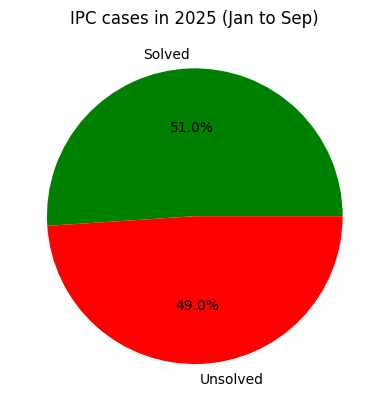

In [127]:
plt.pie([total_detected, total_cases - total_detected], labels = ["Solved", "Unsolved"],autopct='%1.1f%%', colors = ["green", "red"])
plt.title("IPC cases in 2025 (Jan to Sep)")
plt.show()

In [132]:
top_det = df1.sort_values("% of Detection_this", ascending=False).head(5)
print(top_det[["Crime Heads", "% of Detection_this"]])

         Crime Heads  % of Detection_this
14           Dacoity                  100
16  Prep.for Dacoity                  100
7    Att.to.C.Murder                   99
1               Hurt                   98
9            Robbery                   98


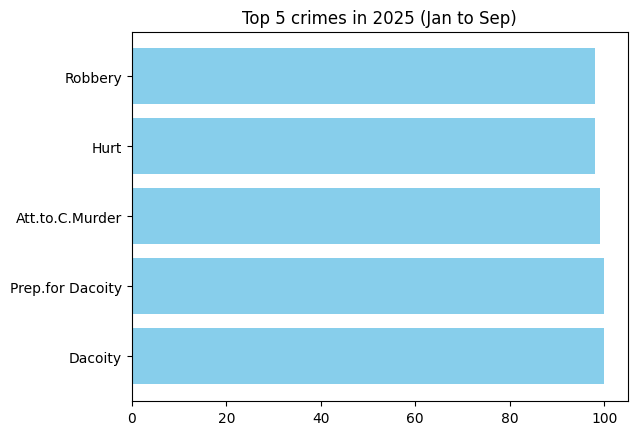

In [137]:
plt.barh(top_det['Crime Heads'], top_det['% of Detection_this'], color = 'skyblue')
plt.title("Top 5 crimes in 2025 (Jan to Sep)")
plt.show()

In [138]:
low_det = df1.sort_values("% of Detection_this").head(5)
print(low_det[["Crime Heads", "% of Detection_this"]])

     Crime Heads  % of Detection_this
0        Thefts.                   32
2    M.V.Thefts.                   58
5   H.B.T.Night.                   64
11     H.B.T.Day                   64
12     Snatching                   83


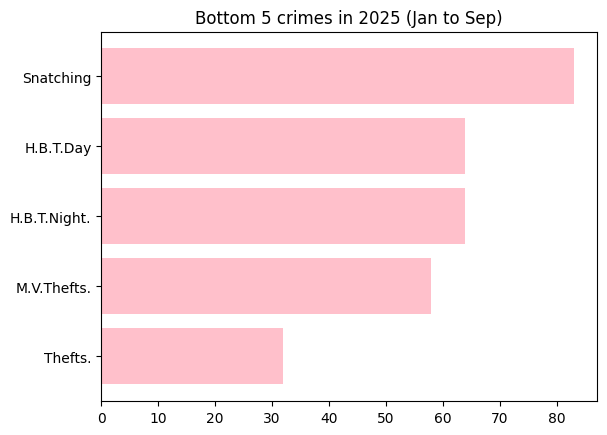

In [140]:
plt.barh(low_det['Crime Heads'], low_det['% of Detection_this'], color = 'pink')
plt.title("Bottom 5 crimes in 2025 (Jan to Sep)")
plt.show()

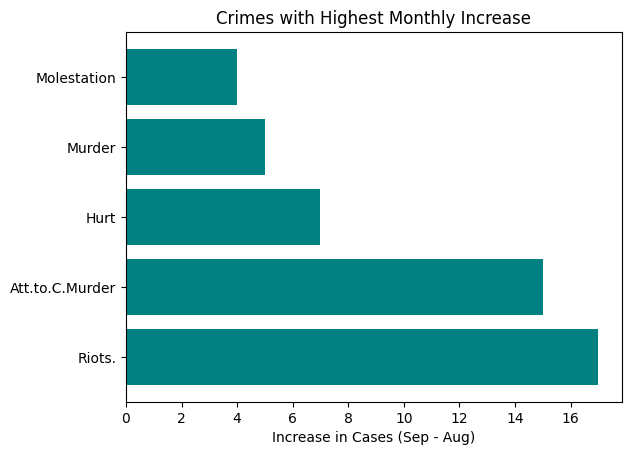

In [144]:
top_inc = df1.sort_values("change_R", ascending=False).head(5)
plt.barh(top_inc["Crime Heads"], top_inc["change_R"], color="teal")
plt.xlabel("Increase in Cases (Sep - Aug)")
plt.title("Crimes with Highest Monthly Increase")
plt.show()